In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("fashion-mnist_train.csv")

In [4]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(60000, 785)

In [6]:
df_test = pd.read_csv("fashion-mnist_test.csv")

In [7]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
df_test.shape

(10000, 785)

In [9]:
x_train = df_train.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train/255

In [10]:
y_train = df_train.iloc[:,0].to_numpy()

In [11]:
x_test = df_test.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

In [12]:
y_test = df_test.iloc[:,0].to_numpy()

In [15]:
class_names = ['T-shirt/Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

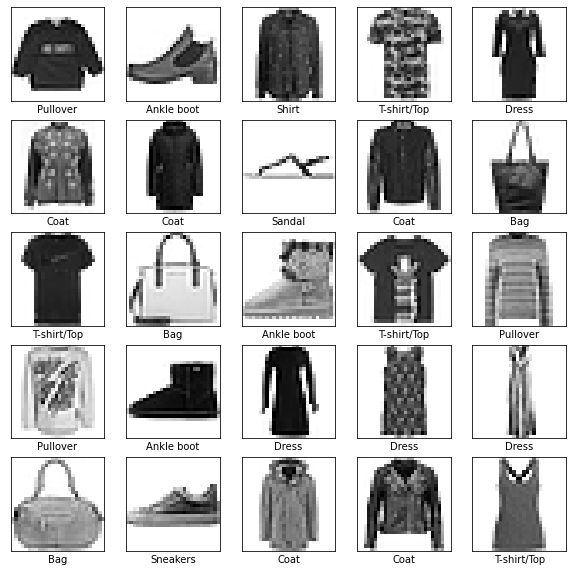

In [16]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=64, input_shape=(28,28,1), kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                346144    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
__________________________________________________

In [20]:
model.fit(x_train, y_train, epochs=20, validation_split=0.05)

Epoch 1/20
1782/1782 [==============================] - 39s 21ms/step - loss: 0.4350 - accuracy: 0.8470 - val_loss: 0.3286 - val_accuracy: 0.8883
Epoch 2/20
1782/1782 [==============================] - 46s 26ms/step - loss: 0.3027 - accuracy: 0.8914 - val_loss: 0.2905 - val_accuracy: 0.8957
Epoch 3/20
1782/1782 [==============================] - 48s 27ms/step - loss: 0.2660 - accuracy: 0.9046 - val_loss: 0.2742 - val_accuracy: 0.9050
Epoch 4/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.2417 - accuracy: 0.9120 - val_loss: 0.2644 - val_accuracy: 0.9067
Epoch 5/20
1782/1782 [==============================] - 46s 26ms/step - loss: 0.2197 - accuracy: 0.9193 - val_loss: 0.2585 - val_accuracy: 0.9113
Epoch 6/20
1782/1782 [==============================] - 42s 23ms/step - loss: 0.2031 - accuracy: 0.9253 - val_loss: 0.2718 - val_accuracy: 0.9023
Epoch 7/20
1782/1782 [==============================] - 36s 20ms/step - loss: 0.1873 - accuracy: 0.9319 - val_loss: 0.2571 -

In [22]:
evaluation = model.evaluate(x_test, y_test)
evaluation

313/313 [==============================] - 2s 6ms/step - loss: 0.3063 - accuracy: 0.9153


[0.3062836229801178, 0.9153000116348267]

In [23]:
print("Accuracy - ", evaluation[1])

Accuracy -  0.9153000116348267


In [24]:
y_probas = model.predict(x_test)
y_pred = y_probas.argmax(axis=-1)

In [25]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

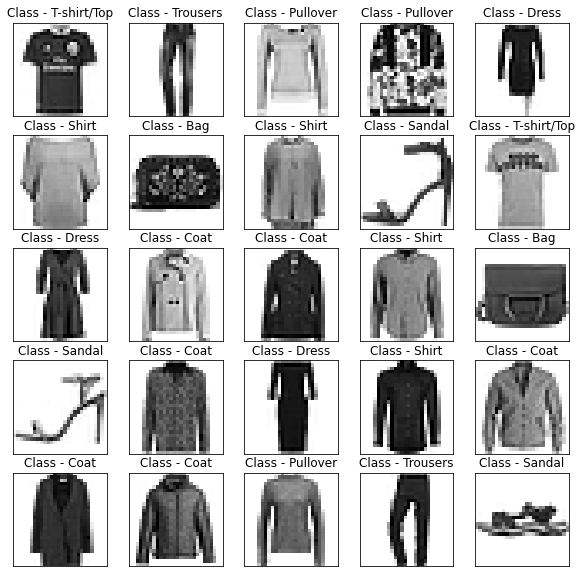

In [26]:
fig = plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Class - {class_names[y_pred[i]]}")
plt.show()

In [27]:
from sklearn.metrics import classification_report

In [29]:
cr = classification_report(y_test, y_pred, target_names=class_names)

In [31]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/Top       0.88      0.86      0.87      1000
    Trousers       0.99      0.99      0.99      1000
    Pullover       0.92      0.79      0.85      1000
       Dress       0.88      0.95      0.92      1000
        Coat       0.82      0.93      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.80      0.76      0.78      1000
    Sneakers       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000

